<p style="font-size: 2em; text-align: center;">Assignment 5: K-Fold Cross-Validation in scikit-learn</p>
<p style="font-size: 1.5em; text-align: center;">Using RepeatedKFold to Evaluate Performance</p>
<p style="text-align: center;">Henry Loughlin</p>
<p style="text-align: center;">EAI6000</p>
<p style="text-align: center;">Professor Mark Wagy</p>
<p style="text-align: center;">May 9, 2022</p>

In [ ]:
from sklearn.datasets import make_classification
from sklearn.model_selection import KFold, cross_val_score, RepeatedKFold
from sklearn.linear_model import LogisticRegression
from scipy.stats import sem
import matplotlib.pyplot as plt
import numpy as np

# We are generating a classification dataset from scikit-learn with 1,000 samples (rows) and 20 features (columns).
X, y = make_classification(n_samples=1000, n_features=20, n_informative=15, n_redundant=5, random_state=1)

print(f"X Shape: {X.shape} | Y Shape: {y.shape}")

# Instantiating our first K-Fold object - in this case, K is 10.
cv = KFold(n_splits=10, random_state=1, shuffle=True)

# Logistic Regression: Binary classification (0 or 1).
model = LogisticRegression()

# Cross-Validation Score for generating mean and standard deviation.
cv_scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1)

print(f"Test Accuracy | Mean: {round(np.mean(cv_scores),3)} SD: {round(np.std(cv_scores),3)}")

X Shape: (1000, 20) | Y Shape: (1000,)
Test Accuracy | Mean: 0.868 SD: 0.032


In [ ]:
# Repeated k-fold serves as the key to the evaluate_model function.
# We also instantiate a fresh LogisticRegression model to generate the scores.

def evaluate_model(X, y, repeats):
    model = LogisticRegression()
    scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=1)
    return scores

In [ ]:
# There is no difference in the X, y above and the one 

results = []

# Our repeats can also be used for future tests, since they won't change.
# And, by putting a res
repeats = range(1,16)

for r in repeats:
    
    scores = evaluate_model(X, y, r)
    
    print("%s. Mean=%.4f SE=%.3f" % (r, np.mean(scores), sem(scores)))
    
    results.append(scores)

1. Mean=0.8680 SE=0.011
2. Mean=0.8680 SE=0.011
3. Mean=0.8680 SE=0.011
4. Mean=0.8680 SE=0.011
5. Mean=0.8680 SE=0.011
6. Mean=0.8680 SE=0.011
7. Mean=0.8680 SE=0.011
8. Mean=0.8680 SE=0.011
9. Mean=0.8680 SE=0.011
10. Mean=0.8680 SE=0.011
11. Mean=0.8680 SE=0.011
12. Mean=0.8680 SE=0.011
13. Mean=0.8680 SE=0.011
14. Mean=0.8680 SE=0.011
15. Mean=0.8680 SE=0.011


In [ ]:
title = "Cross-Validation Boxplots"
rep = "Repeat"
sc = "Score"

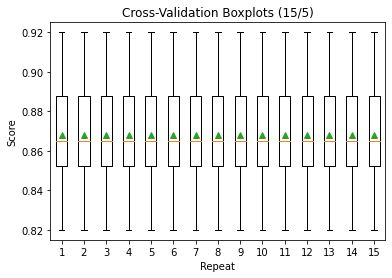

In [ ]:
# Generating boxplots for each of the repeats is very easy with Matplotlib.
# Here there are 15 informative and 5 redundant features.
plt.xlabel(rep)
plt.ylabel(sc)
plt.title(title + " (15/5)")
plt.boxplot(results, labels=[str(r) for r in repeats], showmeans=True)
plt.show()

In [ ]:
# In exploring potential improvements, let's see if altering the number
# of informative and redundant features affects the accuracy.

# Given that models tend to perform better on cross-validation when they can
# generalize well, let's increase the number of redundant features and see
# if this makes it easier for our model to generalize.

X, y = make_classification(n_samples=1000, n_features=20, n_informative=14, n_redundant=6, random_state=1)

new_results = []

for r in repeats:
    
    scores = evaluate_model(X, y, r)
    
    print(f"{r}. Mean: {round(np.mean(scores),3)} SE: {round(sem(scores),3)}")
    
    new_results.append(scores)

1. Mean: 0.876 SE: 0.009
2. Mean: 0.876 SE: 0.009
3. Mean: 0.876 SE: 0.009
4. Mean: 0.876 SE: 0.009
5. Mean: 0.876 SE: 0.009
6. Mean: 0.876 SE: 0.009
7. Mean: 0.876 SE: 0.009
8. Mean: 0.876 SE: 0.009
9. Mean: 0.876 SE: 0.009
10. Mean: 0.876 SE: 0.009
11. Mean: 0.876 SE: 0.009
12. Mean: 0.876 SE: 0.009
13. Mean: 0.876 SE: 0.009
14. Mean: 0.876 SE: 0.009
15. Mean: 0.876 SE: 0.009


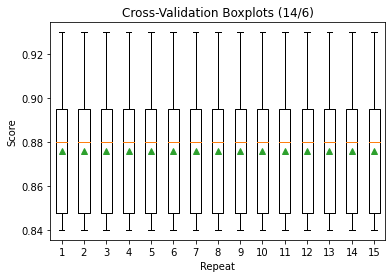

In [ ]:
# Wow, there is an improvement in both the mean and SE!
# Generating boxplots for each of the repeats is very easy with Matplotlib.
plt.title(title + " (14/6)")
plt.xlabel(rep)
plt.ylabel(sc)
plt.boxplot(new_results, labels=[str(r) for r in repeats], showmeans=True)
plt.show()

In [ ]:
# For fun, let's try 10/10.
X, y = make_classification(1000, 20, n_informative=10, n_redundant=10, random_state=1)

newest_results = []

for r in repeats:
    scores = evaluate_model(X, y, r)
    
    print(f"{r}. Mean: {round(np.mean(scores),3)} SE: {round(sem(scores),3)}")

    newest_results.append(scores)

1. Mean: 0.901 SE: 0.009
2. Mean: 0.901 SE: 0.009
3. Mean: 0.901 SE: 0.009
4. Mean: 0.901 SE: 0.009
5. Mean: 0.901 SE: 0.009
6. Mean: 0.901 SE: 0.009
7. Mean: 0.901 SE: 0.009
8. Mean: 0.901 SE: 0.009
9. Mean: 0.901 SE: 0.009
10. Mean: 0.901 SE: 0.009
11. Mean: 0.901 SE: 0.009
12. Mean: 0.901 SE: 0.009
13. Mean: 0.901 SE: 0.009
14. Mean: 0.901 SE: 0.009
15. Mean: 0.901 SE: 0.009


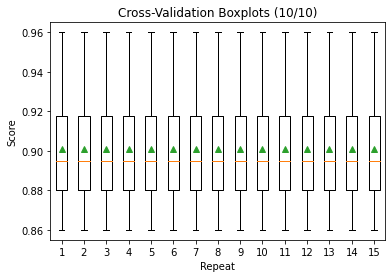

In [ ]:
# Marginal improvement.
plt.title(title + " (10/10)")
plt.xlabel(rep)
plt.ylabel(sc)
plt.boxplot(newest_results, labels=[str(r) for r in repeats], showmeans=True)
plt.show()